#   Handwritten digits classification using neural network
                    
In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will <br> than add a hidden layer and see how the performance of the model improves

## Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## Importing Dataset

In [4]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data() #downloading from keras

In [5]:
len(X_train)

60000

In [6]:
len(X_test)

10000

In [7]:
X_train[0].shape 

(28, 28)

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Notes: 0 means Black 255 means white


### showing the image

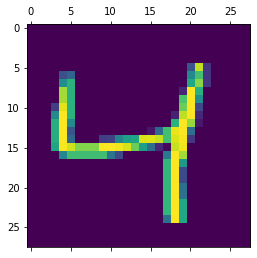

In [10]:
plt.matshow(X_train[2])  #position 2

In [11]:
y_train[2]

4

In [12]:
# first 5 data from y_train
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

# Scaling Data

In [20]:
X_train = X_train / 255
X_test = X_test / 255

In [21]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# Converting Data 

we want to flatten our dataset. It means we will convert 28x28 grid to 1D array

To do this things , we use reshape function.

In [22]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [23]:
X_train_flattened.shape

(60000, 784)

In [24]:
X_test_flattened.shape

(10000, 784)

# Creating Simple Neural Network

<img src="Flatten.png">

**Notes:** 

<p>keras.Sequential() -> is the stack on neural Network.Since it is a stack it will accept every layer as one element.</p>

<p>keras.layers.Dense()-> is a API where one layer of neuron is connected to every other neuron of Second layer.<br>
    It takes output shape, input shape & activation. we will use sigmoid activation</p>

<p>input_shape()-> takes input size , since here input is 784, output shape is 10 </p>

we need to compile the model.
<p>Optimizer allows to train effeciently, it allows to reach global optima.</p>
<p>sparse_categorical_crossentropy: it means our class output is categorical (0 to 9).<br>
 <b>sparse<b> means our ouput variable is integer number. *epochs* means iteration</p>



In [25]:

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 532us/step - loss: 0.4664 - accuracy: 0.8767
Epoch 2/5
1875/1875 [==============================] - 1s 528us/step - loss: 0.3039 - accuracy: 0.9155
Epoch 3/5
1875/1875 [==============================] - 1s 529us/step - loss: 0.2835 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 1s 528us/step - loss: 0.2735 - accuracy: 0.9226
Epoch 5/5
1875/1875 [==============================] - 1s 534us/step - loss: 0.2670 - accuracy: 0.9258


# Evaluating Model

In [26]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 424us/step - loss: 0.2713 - accuracy: 0.9243


[0.2713445723056793, 0.9243000149726868]

In [30]:
y_predicted = model.predict(X_test_flattened)
y_predicted[3]

array([9.9945068e-01, 3.2234858e-08, 6.6843748e-02, 6.6796541e-03,
       7.0636786e-05, 1.0657641e-01, 1.0497573e-01, 1.6426980e-02,
       5.3561181e-02, 1.9534171e-02], dtype=float32)

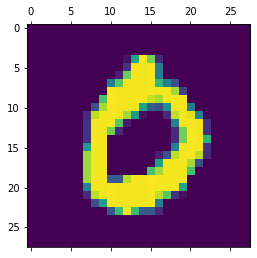

In [31]:
plt.matshow(X_test[3])

**np.argmax finds a maximum element from an array and returns the index of it**

In [32]:
np.argmax(y_predicted[3])

0

In [35]:
# we need whole no. for y_predicted , so we will use np.argmax

y_predicted_labels = [np.argmax(i) for i in y_predicted]


In [36]:
# Seeing first 5 no.
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [38]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [37]:
# Checking Confusion matrix, it takes labels as true value and prediction as predicted

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    0,    2,    0,    4,    4,    2,    3,    0],
       [   0, 1113,    3,    2,    0,    1,    4,    2,   10,    0],
       [   6,   11,  895,   27,   11,    4,   12,   10,   53,    3],
       [   3,    0,   12,  924,    0,   19,    3,   10,   31,    8],
       [   2,    1,    3,    1,  923,    0,   10,    4,   11,   27],
       [   9,    3,    1,   35,   12,  768,   13,    5,   40,    6],
       [  12,    3,    2,    2,    7,   11,  914,    2,    5,    0],
       [   1,    7,   20,    8,   10,    1,    0,  945,    5,   31],
       [   5,    8,    5,   17,    9,   18,    8,    9,  889,    6],
       [   9,    7,    1,   10,   34,    6,    0,   21,   14,  907]])>

Text(69.0, 0.5, 'Truth')

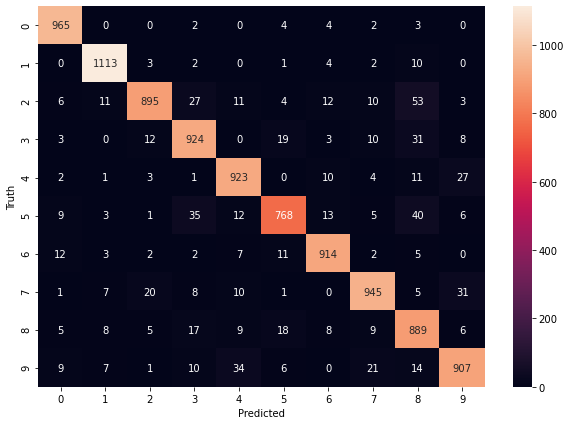

In [39]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Notes** Anything number that is not diagonal is errors. EX: 895 times our model predicted 2 is correct, 
11 times predicted as 1 and 6 times predicted as 0

# Adding Hidden layer

**First layer takes:**
* no of neuron , which will be less than input shape,
* Input Shape
* Activation Function

**Second layer takes:**
* Output Shape
* Activation Function

In [41]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 628us/step - loss: 0.2785 - accuracy: 0.9207
Epoch 2/5
1875/1875 [==============================] - 1s 625us/step - loss: 0.1271 - accuracy: 0.9634
Epoch 3/5
1875/1875 [==============================] - 1s 625us/step - loss: 0.0877 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 1s 623us/step - loss: 0.0668 - accuracy: 0.9798
Epoch 5/5
1875/1875 [==============================] - 1s 624us/step - loss: 0.0524 - accuracy: 0.9835


In [42]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 543us/step - loss: 0.0793 - accuracy: 0.9746


[0.07931206375360489, 0.9746000170707703]

Text(69.0, 0.5, 'Truth')

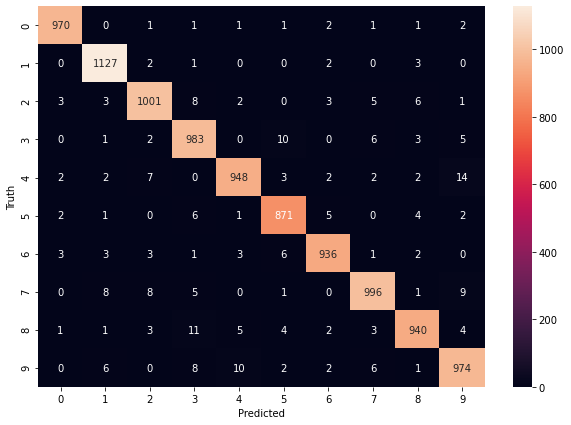

In [44]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Using Flatten layer so that we don't have to call .reshape on input dataset**

In [45]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 633us/step - loss: 0.2711 - accuracy: 0.9223
Epoch 2/10
1875/1875 [==============================] - 1s 652us/step - loss: 0.1227 - accuracy: 0.9645
Epoch 3/10
1875/1875 [==============================] - 1s 660us/step - loss: 0.0848 - accuracy: 0.9749
Epoch 4/10
1875/1875 [==============================] - 1s 618us/step - loss: 0.0654 - accuracy: 0.9798
Epoch 5/10
1875/1875 [==============================] - 1s 614us/step - loss: 0.0518 - accuracy: 0.9840
Epoch 6/10
1875/1875 [==============================] - 1s 627us/step - loss: 0.0428 - accuracy: 0.9869
Epoch 7/10
1875/1875 [==============================] - 1s 623us/step - loss: 0.0355 - accuracy: 0.9892
Epoch 8/10
1875/1875 [==============================] - 1s 615us/step - loss: 0.0282 - accuracy: 0.9916
Epoch 9/10
1875/1875 [==============================] - 1s 661us/step - loss: 0.0249 - accuracy: 0.9924
Epoch 10/10
1875/1875 [==============================] - 1s 669u

In [46]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 530us/step - loss: 0.0795 - accuracy: 0.9773


[0.07948532700538635, 0.9772999882698059]